<a href="https://colab.research.google.com/github/DanB1421/DATA602/blob/main/Brilliant_Problem_Set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 1

**REMINDER**: Please complete the initial course survey here before submitting the assignment: https://forms.office.com/r/QE3U3xKVKW

For problems 1 and 2, use declarative code in Pandas to arrive at your solution.  Full credit will not be given for imperative approaches, such as iterating through rows.

## Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

###Import data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!mkdir -p datashim
!cp /content/drive/Shareddrives/DS602-F22/Data/data602.py ./datashim
from datashim import data602

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cdf = data602.read_citations()
wdf = data602.read_weather()

## Question 1 (10%)

Using the `weather` dataset, provide the following summary statistics:

###a. Over the entire datasets, which observations had the hottest and coldest temperatures? What were those temperatures?

In [ ]:
wdf.head() # shows the first 5 entries in the datafraame

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0


In [ ]:
wdf_cold = wdf[wdf.tmp_meas == wdf.tmp_meas.min()] # finds the entries with the minimum temperature value(s)
# code idea from https://www.geeksforgeeks.org/select-row-with-maximum-and-minimum-value-in-pandas-dataframe/
wdf_cold["tmp_meas"] # displays the minimum temperature value(s)

17694   -16.1
17696   -16.1
Name: tmp_meas, dtype: float64

In [ ]:
wdf_hot = wdf[wdf.tmp_meas == wdf.tmp_meas.max()] # finds the entries with the maximum temperature value(s)
wdf_hot["tmp_meas"] # displays the maximum temperature value(s)
# code idea from https://www.geeksforgeeks.org/select-row-with-maximum-and-minimum-value-in-pandas-dataframe/

39893    37.8
Name: tmp_meas, dtype: float64

Observations 17694 and 17696 had the coldest temperatures, at -16.1, while observation 39893 had the hottest temperature at 37.8.

### b. In 2020, what month had the hottest average temperature? The coldest?

In [ ]:
wdf_2020 = wdf[wdf["date"].between('2020-01-01', '2021-01-01')] # creates dataframe from data found in the year 2020
wdf_2020_monthly = wdf_2020.groupby([wdf_2020['date'].dt.year, wdf_2020['date'].dt.month]).mean().sort_values(by="tmp_meas", ascending=False) # creates dataframe with average observed values grouped by year and month, ordered by temperature from hottest to coldest
# code idea from https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year
wdf_2020_monthly["tmp_meas"] # displays the average monthly temperature averages from hottest to coldest

date  date
2020  7       27.809005
      8       25.505114
      6       24.038750
      9       20.465972
      5       16.923822
      10      15.254435
      4       11.843472
      11      11.390707
      3       10.436205
      2        5.502730
      1        4.853495
      12       4.250000
Name: tmp_meas, dtype: float64

In 2020, the month with the hottest average temperature was July, while the month with the coldest average temperature was December.

### c. In 2020, how many days were associated with rain (i.e., liquid precipitation exceeding zero for at least one observation)?

In [ ]:
wdf_2020_precip = wdf_2020[wdf_2020['precip'] > 0] # creates dataframe that contains all observations of precipitation exceeding 0
wdf_2020_precip_days = wdf_2020_precip.groupby([wdf_2020_precip['date'].dt.month, wdf_2020_precip['date'].dt.day]).sum() # creates dataframe with summed observed values grouped by month and day
len(wdf_2020_precip_days.index) # displays the number of total days in 2020 associated with rain

144

There were 144 days in 2020 associated with rain.

##Question 2 (25%)
From the `citations` dataset, provide the following summary statistics:

###a. Which violation types, on average, incur the highest fines?

In [ ]:
cdf.head() # shows the first 5 entries in the dataframe

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
0,91,03W671,MD,27,No Stop/Park Street Cleaning,52,2011-12-09 11:55:00-05:00,<NA>,2011-12-09 11:55:00
1,166,T294093T,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2011-12-09 12:39:00-05:00,<NA>,2011-12-09 12:39:00
2,299,19TLR318,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 11:55:00-05:00,<NA>,2011-12-09 11:55:00
3,315,14TLR551,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 12:01:59-05:00,<NA>,2011-12-09 12:01:59
4,562,9AE2340,MD,18,All Other Parking Meter Violations,32,2011-12-12 10:47:00-05:00,LAFAYETTE MARKET LOT Baltimore MD,2011-12-12 10:47:00


In [ ]:
cdf_violations = cdf.groupby(["description"]).mean().sort_values(by="violfine", ascending=False) # creates dataframe grouped by description, ordered by average fines from largest to smallest
cdf_violations["violfine"] # displays the average fine values in order from largest to smallest

description
No Parking/Standing Vendor Truck                                   502.000000
Unlawful Dumping/Waste Hauler w/o Permit                           502.000000
No Stop/Park Handicap                                              489.264300
Commercial Veh/Residence over 20,000 lbs                           474.644722
Abandonded Vehicle                                                 279.433362
Commercial Vehicle Obstruct/Imped Traffic Flow                     252.000000
Obstructing/Imped Traffic Xwalk/inter/school                       252.000000
No Parking/Standing In Bus Stop/Bus Lane                           252.000000
No Parking/Stand Motor Home/Campr/Travel Trailer                   252.000000
Commercial Veh/Residence under 20,000 lbs                          241.736101
No Parking/Standing In Bike Lanes                                  197.302013
Res. Park Permit 4th Offense                                       152.000000
Obstructing or Impeding Traffic in an Intersection o

No Parking/Standing Vendor Truck and Unlawful Dumping/Waste Hauler w/o Permit violations have the highest average fine values at 502.

###b. In 2020, which violation type was the most common? What percentage of total citations issued that year did it comprise?

In [ ]:
cdf_2020 = cdf[cdf["violdate"].between('2020-01-01', '2021-01-01')] # creates dataframe from data found in the year 2020
cdf_2020_count = cdf_2020.groupby(["description"]).count().sort_values(by="citation", ascending=False) # creates dataframe of counts grouped by description, ordered by number of citations from largest to smallest
cdf_2020_count["citation"] # displays the number of citations for each violation from largest to smallest

description
Fixed Speed Camera                                                 597338
Red Light Violation                                                109200
Right on Red                                                       106287
All Other Parking Meter Violations                                  62520
No Stopping/Standing Not Tow-Away Zone                              33043
Residential Parking Permit Only                                     16361
No Stopping/Standing Tow Away Zone                                  15174
No Stop/Park Street Cleaning                                        10945
Expired Tags                                                         9009
All Other Stopping or Parking Violations                             7274
No Parking/Standing In Bus Stop/Bus Lane                             6176
Obstruct/Impeding Movement of Pedestrian                             4163
Less Than 15 feet from Fire Hydrant                                  3389
Passenger Loading Zone    

In [ ]:
(cdf_2020_count["citation"][0])/(cdf_2020_count["citation"].sum()) * 100 # calculates the percentage of total violations in 2020 that the most common violation comprised of

60.34661992534185

Fixed Speed Camera violations were the most common type of violation in 2020, and they comprised about 60.3% of all violations

###c. In 2020, which violation type was responsible for the highest fine revenue (i.e., highest sum of fine amounts)? What percentage of total fine revenue did it comprise for the year?


In [ ]:
cdf_2020_sum = cdf_2020.groupby(["description"]).sum().sort_values(by="violfine", ascending=False) # creates dataframe of sums grouped by description, ordered by fine sums from largest to smallest
cdf_2020_sum["violfine"] # displays the total fine revenues from largest to smallest

description
Fixed Speed Camera                                                 23893520
Red Light Violation                                                 8190000
Right on Red                                                        7971525
All Other Parking Meter Violations                                  2000640
No Parking/Standing In Bus Stop/Bus Lane                            1556352
No Stopping/Standing Not Tow-Away Zone                              1057376
Residential Parking Permit Only                                      850772
No Stopping/Standing Tow Away Zone                                   789048
No Stop/Park Handicap                                                670170
No Stop/Park Street Cleaning                                         569140
Obstruct/Impeding Movement of Pedestrian                             320551
Expired Tags                                                         288288
Less Than 15 feet from Fire Hydrant                                  260953


In [ ]:
(cdf_2020_sum["violfine"][0])/(cdf_2020_sum["violfine"].sum()) * 100 # calculates the percentage of fine revenue in 2020 that the highest fine revenue earner comprised of

48.28119806216627

Fixed Speed Camera violations were the highest fine revenue earner in 2020, and they comprised about 48.3% of all fine revenue for that year.

###d. Show the fines charged against the 10 tags (license plates) with the highest total fines assessed in 2020. For each, show the total number of citations, and mean/standard deviation of the fine amount.

In [ ]:
cdf_2020_tag_sum = cdf_2020.groupby(["tag"]).sum().sort_values(by="violfine", ascending=False).reset_index().head(10) # creates dataframe containing the 10 tags with the highest total fines assessed in 2020 sorted from largest to smallest
cdf_2020_tag_sum[["tag", "violfine"]] # displays the tags and their total fine amounts from the new dataframe

,tag,violfine
0,A354123,5895
1,NO TAGST,4777
2,9DR2114,4740
3,6EE1679,4630
4,URX4846,4421
5,4CXM25,4365
6,RR5H74,4237
7,8DW4455,3980
8,2CC3046,3882
9,A334199,3812


In [ ]:
tag_list = cdf_2020_tag_sum["tag"].tolist() # creates a list of tags from the column in the above data frame
cdf_2020_tag_total = cdf_2020.loc[cdf_2020["tag"].isin(tag_list)].groupby(["tag"]).count().sort_values(by="citation", ascending=False) # creates a dataframe grouped by counts for the 10 most fined tags sorted from most to least citations
cdf_2020_tag_total["citation"] # displays the total number of citations for each of the 10 most fined tags

tag
A354123     143
NO TAGST    116
9DR2114     101
4CXM25       96
8DW4455      89
2CC3046      88
6EE1679      86
RR5H74       86
A334199      78
URX4846      76
Name: citation, dtype: int64

In [ ]:
cdf_2020_tag_mean = cdf_2020.loc[cdf_2020["tag"].isin(tag_list)].groupby(["tag"]).mean().sort_values(by="violfine", ascending=False) # creates a dataframe grouped by means for the 10 most fined tags sorted from highest to lowest mean fine values
cdf_2020_tag_mean["violfine"] # displays the mean fine value for each of the 10 most fined tags

tag
URX4846     58.171053
6EE1679     53.837209
RR5H74      49.267442
A334199     48.871795
9DR2114     46.930693
4CXM25      45.468750
8DW4455     44.719101
2CC3046     44.113636
A354123     41.223776
NO TAGST    41.181034
Name: violfine, dtype: float64

In [ ]:
cdf_2020_tag_std = cdf_2020.loc[cdf_2020["tag"].isin(tag_list)].groupby(["tag"]).std().sort_values(by="violfine", ascending=False) # creates a dataframe grouped by standard deviations for the 10 most fined tags sorted from highest to lowest standard deviations of fine value
cdf_2020_tag_std["violfine"] # displays the standard deviation of fine values for each of the 10 most fined tags

tag
NO TAGST    33.152769
6EE1679     17.212759
URX4846     16.187557
RR5H74      16.154711
A334199     15.468744
9DR2114     14.017316
4CXM25      12.774937
8DW4455     12.021750
2CC3046     11.195680
A354123      6.451793
Name: violfine, dtype: float64

###e. Due to accuracy concerns, Baltimore City suspended fixed speed camera enforcement for a multi-year period that is covered by the dataset. Using the data, show when the hiatus began and when citations resumed.

In [ ]:
cdf_enforcement_check = cdf.loc[cdf["location"].str.contains("Baltimore") & cdf["description"].isin(["Fixed Speed Camera"])].groupby([cdf['violdate'].dt.year, cdf['violdate'].dt.month]).count() # creates a dataframe where Baltimore is specified as the location, and Fixed Speed Camera is specified as the violation, and it is grouped by the date of violation (month and year) into citation counts
cdf_enforcement_check["citation"] # displays total number of citations

violdate  violdate
2009      12              1
2010      6               3
          7               2
          9               3
          12              3
2011      1              50
          2              49
          3              60
          4              57
          5              80
          6              79
          7              52
          8              62
          9              50
          10             57
          11            112
          12            112
2012      1              91
          2              28
          3             110
          4             124
          5             145
          6             171
          7             170
          8             127
          9             100
          10             40
          11             47
          12             28
2017      7            1674
          8           28992
          9           22119
          10          30926
          11          33019
          12          23062
2

According to the dataset, fixed speed camera enforcement in Baltimore City began hiatus after December of 2012, and enforcement resumed in July of 2017.

##Question 3 (25%)
**Frawley, et al., define an 'interesting' pattern as interesting if it is "novel, useful, and non-trivial to compute."  Explore either of the above datasets to identify an interesting pattern.  Describe the pattern and why it is novel, useful, and non-trivial.**

Note: this question does not require code.  Submit your response as text within the notebook, or as a Word document if you prefer.

Text(0, 0.5, 'Average Monthly Temp')

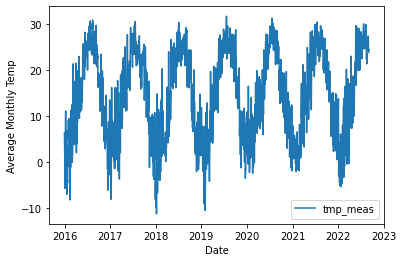

In [ ]:
wdf_agg = wdf.groupby('date').mean()
wdf_agg.reset_index(level=0, inplace=True)
wdf_agg.plot(x="date", y="tmp_meas")
plt.xlabel("Date",  size = 10)
plt.ylabel("Average Monthly Temp", size = 10)

The average monthly temperature over time is an interesting pattern. It is novel because it shows the average variation in monthly temperature over a multiyear period. It is useful because it is a pattern that can be used to further analyze climate data that follow these patterns in other datasets. It is non-trivial because it can be used to develop a model for predicting monthly temperature trends in the future.

# Question 4 (25%)
**Machine Learning, Safety, and Fairness** Review the source materials for one of the examples of unfairness in machine learning discussed in class, and answer the following questions.  

(a) Mehrabi et al. define fairness in machine learning as ``absence of any prejudice or favoritism toward an individual or group based on
their inherent or acquired characteristics''.  Using this definition, how does the application of the machine learning approach result in an unfair outcome?

(b) What practices, if any, mitigated the impact of the algorithm's unfairness?

(c) What lessons can be learned from this example?


(a). The Amazon recruitment model's application of machine learning resulted in an unfair outcome because there was not an absence of prejudice or favoritism. The model's bias against female job candidates showed that the algorithm itself had bias somehow, and that caused the issue. The main cause of this was a vague business objective that only selected resumes rated at a certain level by the algorithm.

(b). The removal of gendered language from applications was attempted to mitigate the impact of the unfairness. However, this was not successful in removing the bias, so the project was scrapped in the end.

(c). Lessons that could be learned from this example are that a clear and multi-level business objective is important in algorithm development. The more failsafes that are included in an algorithm, the more likely it is to work in the intended fashion. Also, it is important that professionals with knowledge of the process that is being automated by machine learning are involved in algorithm development. That allows for the business objective to be followed in a similar way to the previously human-driven processes that are being automated.